# Lab 6: Modulation and Filtering

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

## Assignment 1 Filtering

#### (A) Using $f_s$ = 4000 Hz, create a time vector t for the range \[0, 500ms). Use t to create the signal x1 corresponding to $x_1(t)$ from the prelab.

In [2]:
fs = 4000
t = np.arange(0, 0.5, 1/fs)
x1 = np.cos(100*t)

#### (B) Define a filter for a first-order system using the parameters from pre-lab 1. (Nfft = 8192). Use the *signal.freqresp* function to find the frequency response of the system and plot the magnitude and phase in side by side plots. For the magnitude plot, overlay the standard magnitude and the magnitude with a dB scale, with the left axis showing the linear amplitude and the right axis showing dB. The frequency axis shall be in rad/s.

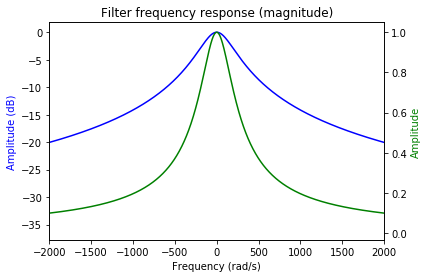

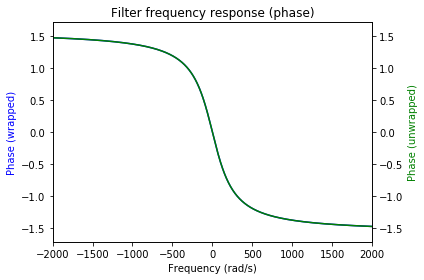

In [3]:
nfft = 8192
sys = signal.lti([200],[1,200])
f = np.arange(-nfft/2, nfft/2, 1)*(fs/nfft)
omega = f*2*np.pi
omega2, h_f = signal.freqresp(sys,omega)
# Magnitude
fig1, ax1 = plt.subplots()
plt.title('Filter frequency response (magnitude)')
ax1.plot(omega, 20*np.log10(abs(h_f)), 'b')
ax1.set_ylabel('Amplitude (dB)', color='b')
ax1.set_xlabel('Frequency (rad/s)')
ax2 = ax1.twinx()
ax2.plot(omega, abs(h_f), 'g')
ax2.set_ylabel('Amplitude', color='g')
ax2.set_xlim(-2000, 2000)
# Phase
fig2, ax1 = plt.subplots()
plt.title('Filter frequency response (phase)')
ax1.plot(omega, np.angle(h_f), 'b')
ax1.set_ylabel('Phase (wrapped)', color='b')
ax1.set_xlabel('Frequency (rad/s)')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h_f))
ax2.plot(omega, angles, 'g')
ax2.set_ylabel('Phase (unwrapped)', color='g')
ax2.set_xlim(-2000, 2000)
fig2.tight_layout()

#### (C) Using the *signal.lsim* function, find the output $y_1$ that is the response of the system to $x_1$. Create a new plot, and plot $x_1$ and $y_1$ together on the same plot. Confirm that the resulting signal matches what you would expect from the pre-lab in terms of changes to amplitude and phase (associated with using a non-ideal filter).

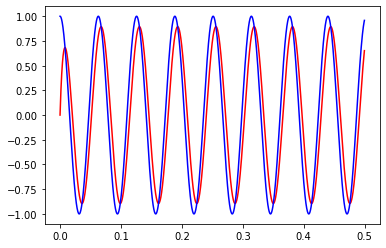

In [4]:
ty, y, xs = signal.lsim(([200], [1, 200]), x1, t)
plt.plot(ty, y, 'r', ty, x1, 'b')

#### Discussion #1: If you put two identical low-pass filters in series, then the overall response will be unchanged. Comment on what will happen if you put two identical versions of the above filter in series.

I think that the amplitude of the total output will be smaller than that of the first filter, and the phase shift will be more pronounced. Essentially, the same effect that took place on the original signal will happen again.

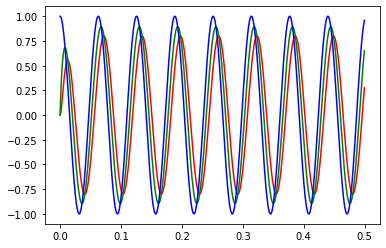

In [5]:
#Confirmation of the above hypothesis
ty2, y2, xs2 = signal.lsim(([200], [1, 200]), y, t)
plt.plot(ty2, y2, 'r', ty2, y, 'g', ty2, x1, 'b')

## Assignment 2: Amplitude Modulation

#### (A) Create two signals to communicate
 Use sampling frequency $f_s = 4000$Hz to create **x1** and **x0** corresponding to:
$$x_1(t) = 50te^{-15t}u(t)$$
$$x_0(t) = -x_1(t)$$
 using a time vector defined over [0, 0.5)

In [6]:
x1 = 50 * t * np.exp(-15*t) * np.heaviside(t,1)
x0 = -x1

Use 2x1 subplots to plot **x1** and the magnitude of its Fourier transform. Use rad/s for the frequency axis, and limit it to [-100, 100) rad/s.

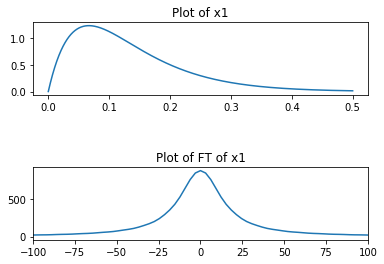

In [7]:
x1_f = np.fft.fft(x1, nfft)
x1_f = np.fft.fftshift(x1_f)
x1_f_abs = np.abs(x1_f)
fig2 = plt.figure(2)
plt.subplots_adjust(hspace = 1, wspace = 1)
plt.subplot(2,1,1)
plt.title('Plot of x1')
plt.plot(t, x1)
plt.subplot(2,1,2)
plt.title('Plot of FT of x1')
plt.xlim(-100, 100)
plt.plot(omega, x1_f_abs)

#### (B) Create and modulate the signal

(a) Construct a message signal **xm** for communicating the bit sequence [1 0 1 0] by concatenating **x1** and **x0** for the plots.

In [126]:
xm = np.concatenate([x1, x0, x1, x0])

(b) Create the carrier signal: $c(t) = cos(200t)$

In [9]:
tm = np.arange(0, 2.0, 1/fs)
c = np.cos(200*tm)

(c) Implement the modulated signal $y(t) = x_m(t)c(t)$

In [10]:
y = xm * c

#### (C) Using 2x1 subplot, plot **xm** and **y**.

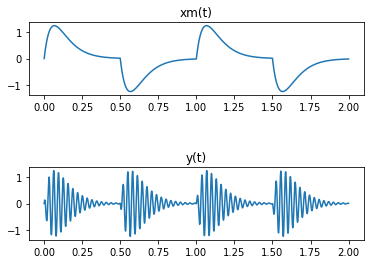

In [11]:
fig3 = plt.figure(3)
plt.subplots_adjust(hspace = 1, wspace = 1)
plt.subplot(2,1,1)
plt.title('xm(t)')
plt.plot(tm, xm)
plt.subplot(2,1,2)
plt.title('y(t)')
plt.plot(tm, y)

#### (D) Using 3x1 subplots, plot the magnitude of the Fourier transforms of **xm**, **c**, and **y**. For **xm**, make the frequency axis in the range [-150, 150), but for the other two plots, use range [-500, 500). Verify that the Fourier transforms put $\omega_c = 200$ rad/s.

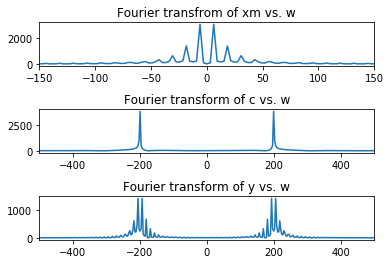

In [12]:
xmfft = np.abs(np.fft.fftshift(np.fft.fft(xm, nfft)))
cfft = np.abs(np.fft.fftshift(np.fft.fft(c, nfft)))
yfft = np.abs(np.fft.fftshift(np.fft.fft(y, nfft)))
fig4 = plt.figure(4)
plt.subplots_adjust(hspace = 1, wspace = 1)
plt.subplot(3,1,1)
plt.title('Fourier transfrom of xm vs. w')
plt.xlim(-150, 150)
plt.plot(omega, xmfft)
plt.subplot(3,1, 2)
plt.title('Fourier transform of c vs. w')
plt.xlim(-500, 500)
plt.plot(omega, cfft)
plt.subplot(3, 1, 3)
plt.title('Fourier transform of y vs. w')
plt.xlim(-500, 500)
plt.plot(omega, yfft)

#### Discussion #2: In this assignment, we analyzed a system with input-output relationship $y(t) = x(t)cos(200t)$. Is this system LTI? Justify your answer.


## Assignment 3: Amplitude Demodulation
We use (ideal) demodulation, to undo the modulation operation. First, multiply the cosine with the frequency used for demodulation. Filter the high frequency components to recover **x(t)**, which is the baseband signal.

(A) Using the carrier from assignment 2, create **z** such that $z(t) = y(t)c(t)$. Using 2x1 subplots, plot **z vs. t** and the magnitude of its Fourier transform. For the Fourier transform plot, limit the frequency axis to the range [-1000, 1000).

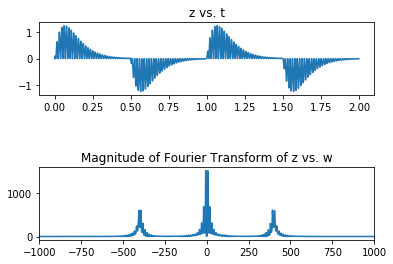

In [13]:
z = y*c
zfft = np.abs(np.fft.fftshift(np.fft.fft(z, nfft)))
fig5 = plt.figure(5)
plt.subplots_adjust(hspace=1, wspace=1)
plt.subplot(2, 1, 1)
plt.title('z vs. t')
plt.plot(tm, z)
plt.subplot(2,1,2)
plt.title('Magnitude of Fourier Transform of z vs. w')
plt.xlim(-1000, 1000)
plt.plot(omega, zfft)

#### (B) Create a low pass filter using the coefficients that you computed in part 3 of the pre-lab. Find the frequency response of the filter using **signal.freqresp**. Use a single plot with parallel axes, plot the magnitude (dB scale) and the phase of the system frequency response, with magnitude on the left axis and phase on the right. Use frequency range [-300, 300) rad/s.

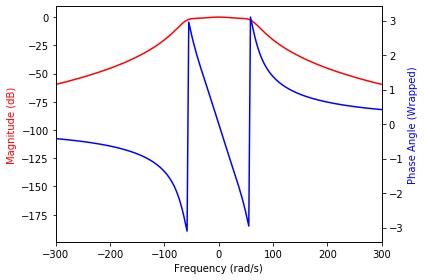

In [14]:
a3 = [240, 3e4, 2.2e6, 1e8, 2e9]
b3 = [2e9]
lpf = signal.lti(b3, a3)
omega2, h2_f = signal.freqresp(lpf, omega)
fig6, ax1 = plt.subplots()
ax1.set_ylabel('Magnitude (dB)', color='r')
ax1.set_xlabel('Frequency (rad/s)')
ax1.plot(omega2, 20*np.log10(np.abs(h2_f)), 'r')
ax2 = ax1.twinx()
ax2.set_ylabel('Phase Angle (Wrapped)', color='b')
ax2.plot(omega2, np.angle(h2_f), 'b')
ax1.set_xlim(-300, 300)
fig6.tight_layout()

#### (C) Use **signal.lsim** to filter **z** with the low pass filter. Consider the output of the filter as $x_r(t)$. Using 2x1 subplots, plot **xr** and the magnitude of its Fourier transform. Limit the frequency axis to the range [-150, 150) rad/s.

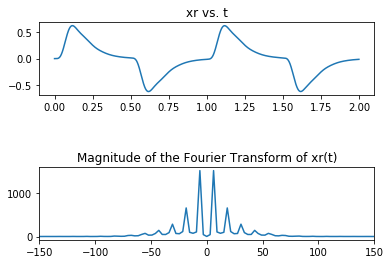

In [15]:
tr, xr, zs = signal.lsim((b3,a3), z, tm)
xrfft = np.abs(np.fft.fftshift(np.fft.fft(xr, nfft)))
fig7 = plt.figure(7)
plt.subplots_adjust(hspace=1, wspace=1)
plt.subplot(2,1,1)
plt.title('xr vs. t')
plt.plot(tr, xr)
plt.subplot(2,1,2)
plt.title('Magnitude of the Fourier Transform of xr(t)')
plt.xlim(-150, 150)
plt.plot(omega, xrfft)

#### **Discussion #3:** A student decides to use a shorter signal of the form $x_1(t) = Ate^{-150t}u(t)$, thinking that the message can be communicated in a tenth of the time. They claim to see the exact same graph for $x_r(t)$ as they saw in their pre-lab. Explain why the student is incorrect, and why this solution will not work.

## Assignment 4: Decoding a Morse Code Message
Signal y(t) contains a message from Agent 007. The last words of 007 were "The future of technology lies in...". The remainder of the message is saved to a csv file. You must now decipher the message encoded in y(t). The signal was obtained by adding three 2 second message signals each modulated with carrier frequencies of 100, 200 and 400 rad / sample, digitized with a sampling frequency of 4kHz.

(A) Using a new cell, write a function to decode the sequence of dots and dashes in a recieved message of length 2 s with 0.5 s time slots for each symbol. If the message has less than four symbols, the remaining length will be padded with zeros.

In [140]:
def sum_sqr_err(signal, candidate):
    return np.sum((candidate-signal)**2)
z = np.zeros(int(0.5*fs))
def decode(signal):
    signal_bits = np.array_split(signal, 4)
    plt.plot(signal_bits[0])
    plt.plot(signal_bits[1])
    plt.plot(signal_bits[2])
    plt.plot(signal_bits[3])
    message = ''
    for bit in signal_bits:
        dash_err = sum_sqr_err(bit, x1)
        print("dash err = {}".format(dash_err))
        dot_err = sum_sqr_err(bit, x0)
        print("dot err = {}".format(dot_err))
        zero_err = sum_sqr_err(bit, z)
        print("zero err = {}".format(zero_err))
        if zero_err < 100:
            symbol = ''
        elif dash_err < dot_err:
            symbol = '-'
        else:
            symbol = '.'
        print(symbol)
        message = message + symbol
    return message

dash err = 1539.4245466742093
dot err = 300.4681404689953
zero err = 179.23481590768847
.
dash err = 1535.9206390703969
dot err = 302.8660208870215
zero err = 178.68180231479542
.
dash err = 311.617322457815
dot err = 1524.3851962865656
zero err = 177.28973170827655
-
dash err = 735.4628818564368
dot err = 746.0288427557224
zero err = 0.03433464216567818



'..-'

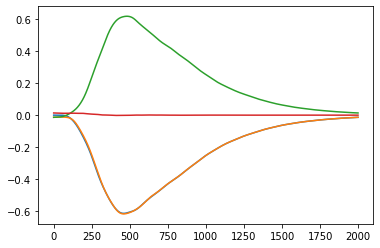

In [141]:
decode(signals[2])

(B) Start another new cell. Load the data file **message_modulated.csv** which is available on Canvas. The file contains the signal *y(t)* with three more messages combined using frequency division multiplexing.

In [142]:
file = open('message_modulated.csv', 'rb')
y = np.loadtxt(file, delimiter=',')
y.shape

(8000,)

(C) Write a loop that:

    (a) Assigns the demodulating frequencies to extract the respective message signal from the composite signal, using your work from the pre-lab part 5 and the knowledge that the carrier signals are $y_1(t) = cos(100t)$, $y_2(t) = cos(200t)$, and $y_3(t) = cos(300t)$;
    
    (b) Demodulates the signal and then filters it as was done in the previous parts and uses the function from part (a) to recover the $i^{th}$ recovered message and output **str**;
    
    (c) Prints out "Message m**i**(t) is: **str**" with the correct values for **i** and **str**.

dash err = 335.9373502704085
dot err = 1498.7367829677307
zero err = 176.62553895515572
-
dash err = 1548.0415680487392
dot err = 300.387398029113
zero err = 183.50295537501222
.
dash err = 327.1460580179484
dot err = 1503.7423783774261
zero err = 174.7326905337734
-
dash err = 305.76292777869395
dot err = 1531.1645833481598
zero err = 177.75222789951312
-
dash err = 329.0934196788896
dot err = 1506.4873761330036
zero err = 177.0788702420328
-
dash err = 287.1655588184619
dot err = 1566.8271288719277
zero err = 186.284816181281
-
dash err = 320.3952754524427
dot err = 1511.5127044790754
zero err = 175.24246230184534
-
dash err = 751.2534248653138
dot err = 734.6086173898675
zero err = 2.2194934636767636

dash err = 1539.4245466742093
dot err = 300.4681404689953
zero err = 179.23481590768847
.
dash err = 1535.9206390703969
dot err = 302.8660208870215
zero err = 178.68180231479542
.
dash err = 311.617322457815
dot err = 1524.3851962865656
zero err = 177.28973170827655
-
dash err = 735.46

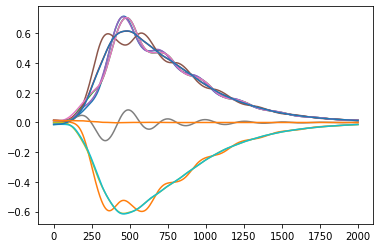

In [143]:
# Carrier frequencies
y1 = np.cos(100 * tm)
y2 = np.cos(200 * tm)
y3 = np.cos(400 * tm)
freqs = [y1, y2, y3]
# Demodulation
messages = [y*y1, y*y2, y*y3]
signals = [signal.lsim((b3,a3), x, tm)[1] for x in messages]
decoded = [decode(x) for x in signals]
for i in range(3):
    str = MORSE_CODE_DICT_REVERSE[decoded[i]]
    print("Message m{}(t) is: {}".format(i, str))

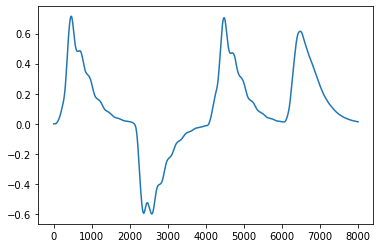

In [144]:
plt.plot(signals[0])

In [145]:
# internet
MORSE_CODE_DICT = { 'A':'.-', 'B':'-...',
'C':'-.-.', 'D':'-..', 'E':'.',
'F':'..-.', 'G':'--.', 'H':'....',
'I':'..', 'J':'.---', 'K':'-.-',
'L':'.-..', 'M':'--', 'N':'-.',
'O':'---', 'P':'.--.', 'Q':'--.-',
'R':'.-.', 'S':'...', 'T':'-',
'U':'..-', 'V':'...-', 'W':'.--',
'X':'-..-', 'Y':'-.--', 'Z':'--..', '':''}
# reverse
MORSE_CODE_DICT_REVERSE = {v : k for k, v in MORSE_CODE_DICT.items()}